In [1]:
import pandas as pd

# URL of the Wikipedia page containing S&P 500 companies
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Scrape the table
tables = pd.read_html(url)  # Read all tables from the Wikipedia page
sp500_table = tables[0]     # The first table usually contains the S&P 500 data


# Display the first few rows
print(sp500_table.head())


  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [2]:
# Save to a CSV file
sp500_table.to_csv('sp500_list.csv', index=False)

# Load it back when needed
sp500_list = pd.read_csv('sp500_list.csv')


In [3]:
sp500_list.head(4)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)


In [4]:
import pickle
def process_data_for_labels(ticker):
  hm_days = 7
  df = pd.read_csv('sp500_list.csv',index_col=0)
  tickers = df.columns.values.tolist()
  df.fillna(0, inplace=True)

  for i in range(1,hm_days+1):
    df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
  df.fillna(0, inplace=True)
  return tickers, df
process_data_for_labels('CIK')

(['Security',
  'GICS Sector',
  'GICS Sub-Industry',
  'Headquarters Location',
  'Date added',
  'CIK',
  'Founded'],
                    Security             GICS Sector  \
 Symbol                                                
 MMM                      3M             Industrials   
 AOS             A. O. Smith             Industrials   
 ABT     Abbott Laboratories             Health Care   
 ABBV                 AbbVie             Health Care   
 ACN               Accenture  Information Technology   
 ...                     ...                     ...   
 XYL              Xylem Inc.             Industrials   
 YUM             Yum! Brands  Consumer Discretionary   
 ZBRA     Zebra Technologies  Information Technology   
 ZBH           Zimmer Biomet             Health Care   
 ZTS                  Zoetis             Health Care   
 
                                    GICS Sub-Industry    Headquarters Location  \
 Symbol                                                             

In [5]:
def buy_sell_hold(*args):
  cols = [c for c in args]
  requirement = 0.02
  for col in cols:
    if col > requirement:
      return 1
    if col < -requirement:
      return -1
  return 0



In [6]:
import yfinance as yf
symbols = sp500_table['Symbol'].tolist()

apple_data = yf.Ticker("AAPL").history(period="1mo")

sp500_data = {symbol: yf.Ticker(symbol).history(period="1mo") for symbol in symbols[:10]}


In [7]:
sp500_data

{'MMM':                                  Open        High         Low       Close  \
 Date                                                                        
 2024-11-14 00:00:00-05:00  131.172379  132.604763  131.072917  131.620010   
 2024-11-15 00:00:00-05:00  130.110001  131.250000  129.710007  129.789993   
 2024-11-18 00:00:00-05:00  129.779999  130.380005  128.570007  130.169998   
 2024-11-19 00:00:00-05:00  129.009995  129.259995  128.000000  128.190002   
 2024-11-20 00:00:00-05:00  128.000000  128.190002  127.099998  127.839996   
 2024-11-21 00:00:00-05:00  127.730003  128.580002  126.320000  127.320000   
 2024-11-22 00:00:00-05:00  127.690002  128.479996  126.370003  128.419998   
 2024-11-25 00:00:00-05:00  129.210007  130.600006  127.550003  130.320007   
 2024-11-26 00:00:00-05:00  129.990005  133.229996  129.649994  132.949997   
 2024-11-27 00:00:00-05:00  133.910004  135.550003  132.360001  132.479996   
 2024-11-29 00:00:00-05:00  132.860001  133.740005  132.0

In [8]:
#automate updates with a scheduler
!pip install schedule # Install the 'schedule' module
import schedule
import time

def update_sp500_list():
  url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
  tables = pd.read_html(url)
  sp500_table = tables[0]
  sp500_table.to_csv('sp500_list.csv',index=False)
  print('S&P 500 list updated!')

schedule.every().day.at("10:00").do(update_sp500_list)

while True:
  schedule.run_pending()
  time.sleep(5)

KeyboardInterrupt: 

In [9]:
import yfinance as yf
import pandas as pd

ticker = "AAPL"
data = yf.Ticker(ticker).history(period="5y")
print(data.head())

sp500_symbols = ['AAPL','MSFT','GOOGL']
sp500_data = {symbol: yf.Ticker(symbol).history(period="5y") for symbol in sp500_symbols}




                                Open       High        Low      Close  \
Date                                                                    
2019-12-16 00:00:00-05:00  67.136665  68.055252  67.131820  67.829842   
2019-12-17 00:00:00-05:00  67.759544  68.292755  67.572914  67.963135   
2019-12-18 00:00:00-05:00  67.815300  68.324280  67.650490  67.800758   
2019-12-19 00:00:00-05:00  67.742584  68.149765  67.609283  67.868614   
2019-12-20 00:00:00-05:00  68.404274  68.506066  67.514770  67.728058   

                              Volume  Dividends  Stock Splits  
Date                                                           
2019-12-16 00:00:00-05:00  128186000        0.0           0.0  
2019-12-17 00:00:00-05:00  114158400        0.0           0.0  
2019-12-18 00:00:00-05:00  116028400        0.0           0.0  
2019-12-19 00:00:00-05:00   98369200        0.0           0.0  
2019-12-20 00:00:00-05:00  275978000        0.0           0.0  


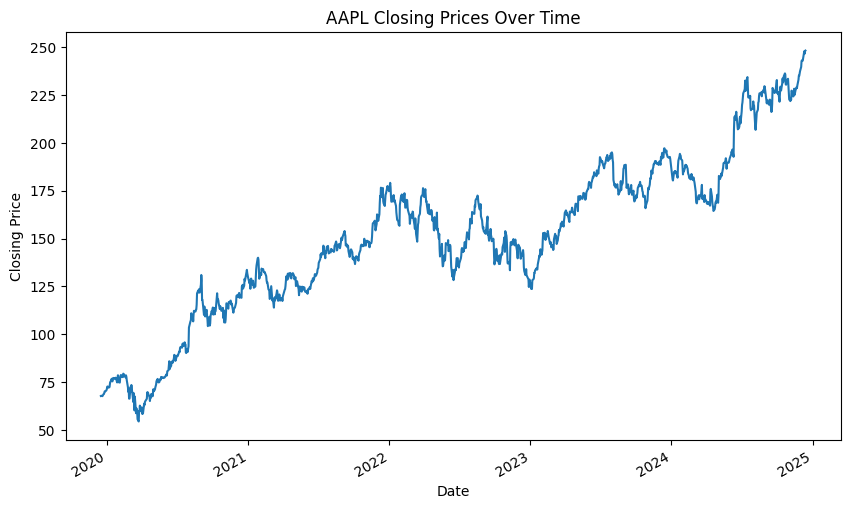

In [10]:
import matplotlib.pyplot as plt

data['Close'].plot(title=f"{ticker} Closing Prices Over Time",figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

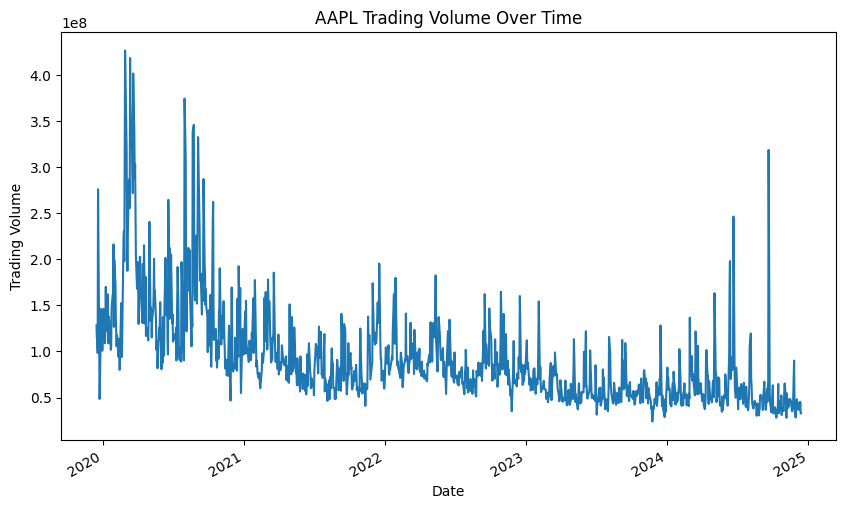

In [11]:
data['Volume'].plot(title=f"{ticker} Trading Volume Over Time",figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()

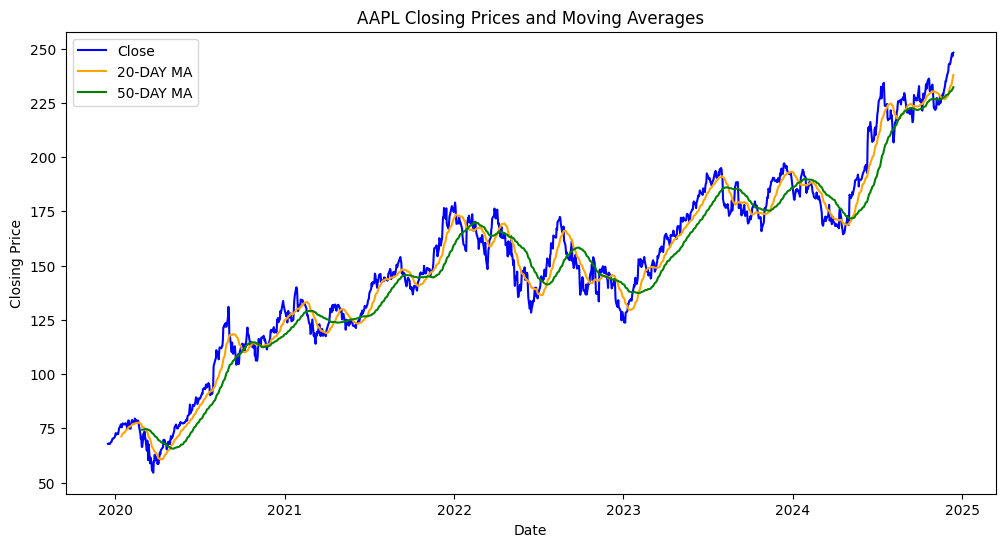

In [12]:
#moving averages
data['20D MA'] = data['Close'].rolling(window=20).mean()
data['50D MA'] = data['Close'].rolling(window=50).mean()


plt.figure(figsize=(12,6))
plt.plot(data['Close'], label = 'Close',color='blue')
plt.plot(data['20D MA'],label = '20-DAY MA', color = 'orange')
plt.plot(data['50D MA'], label = '50-DAY MA', color = 'green')
plt.title(f"{ticker} Closing Prices and Moving Averages")
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


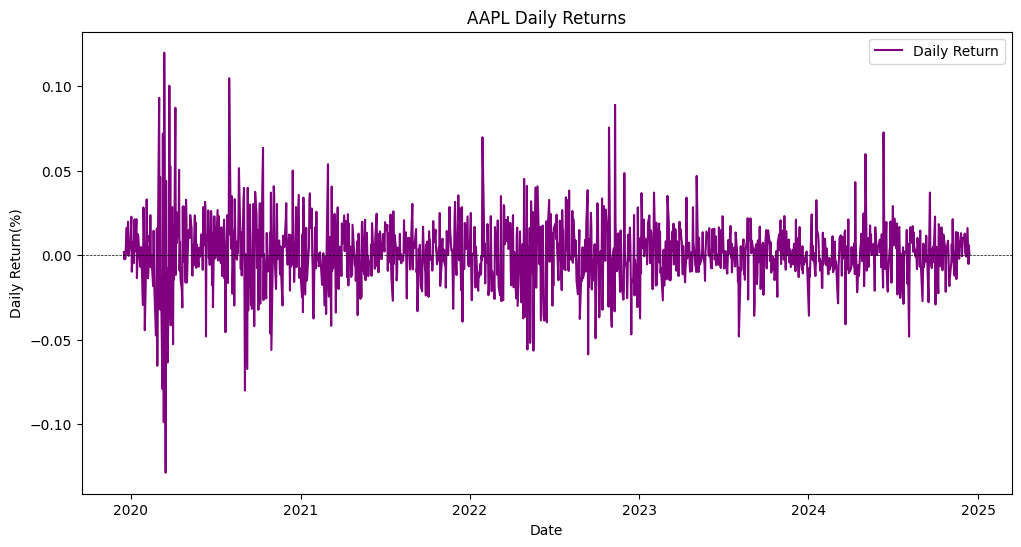

In [13]:
#daily returns
data['Daily Return'] = data['Close'].pct_change()

plt.figure(figsize=(12,6))
plt.plot(data['Daily Return'], label='Daily Return', color='purple')
plt.axhline(0, color='black', linewidth=0.5, linestyle = '--')
plt.title(f"{ticker} Daily Returns")
plt.xlabel('Date')
plt.ylabel('Daily Return(%)')
plt.legend()
plt.show()

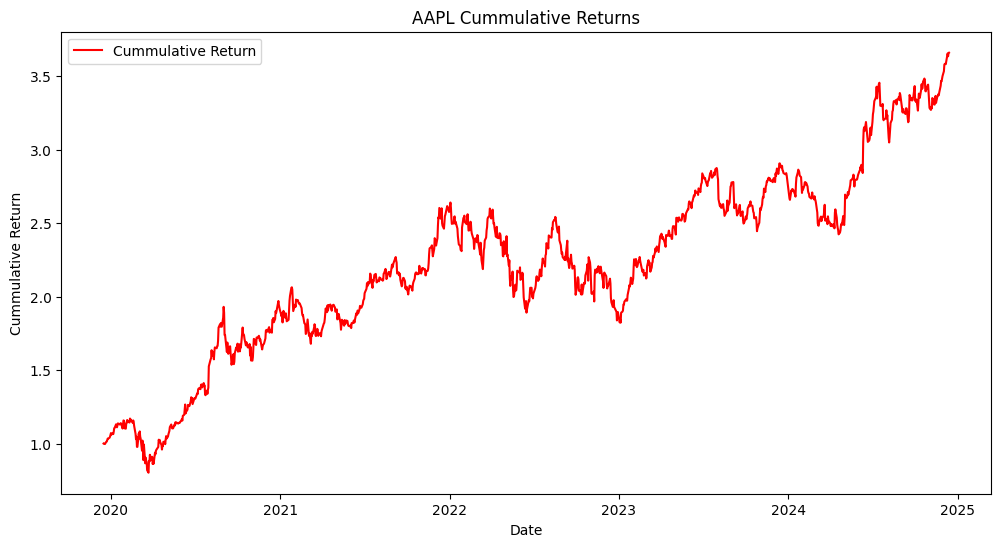

In [14]:
data['Cummulative Return'] = (1+ data['Daily Return']).cumprod()


plt.figure(figsize=(12,6))
plt.plot(data['Cummulative Return'], label = 'Cummulative Return', color='red')
plt.title(f"{ticker} Cummulative Returns")
plt.xlabel('Date')
plt.ylabel('Cummulative Return')
plt.legend()
plt.show()


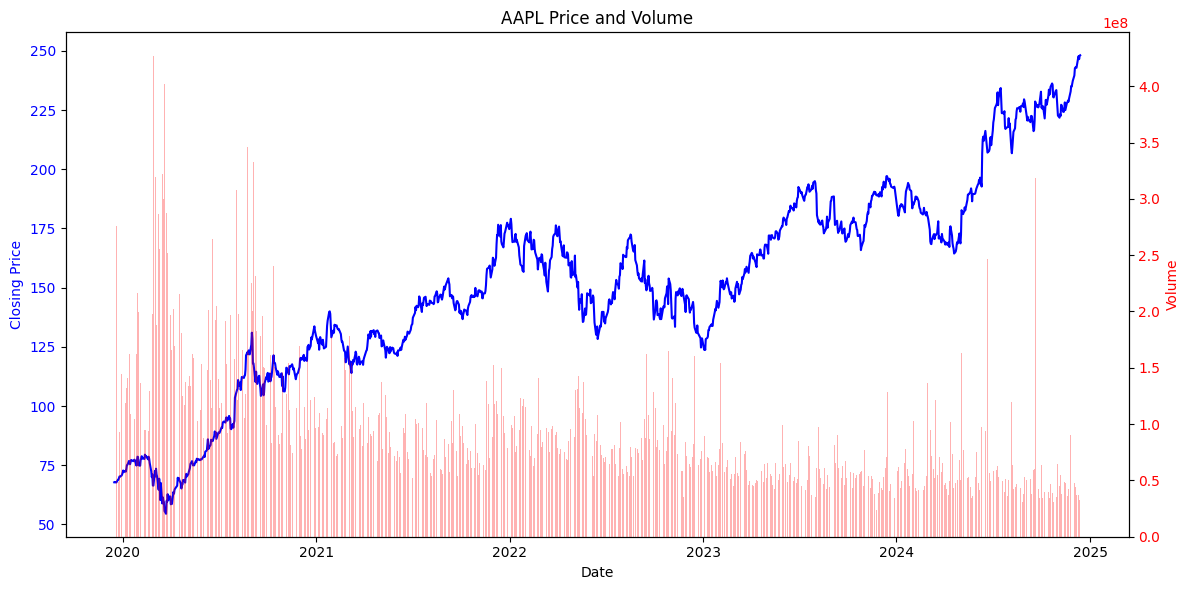

In [15]:
fig, ax1 = plt.subplots(figsize=(12,6))

#Price on primary y-axis
ax1.set_title(f"{ticker} Price and Volume")
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color ='blue')
ax1.plot(data['Close'], label='Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume',color='red')
ax2.bar(data.index, data['Volume'], color='red', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor = 'red')

fig.tight_layout()
plt.show()


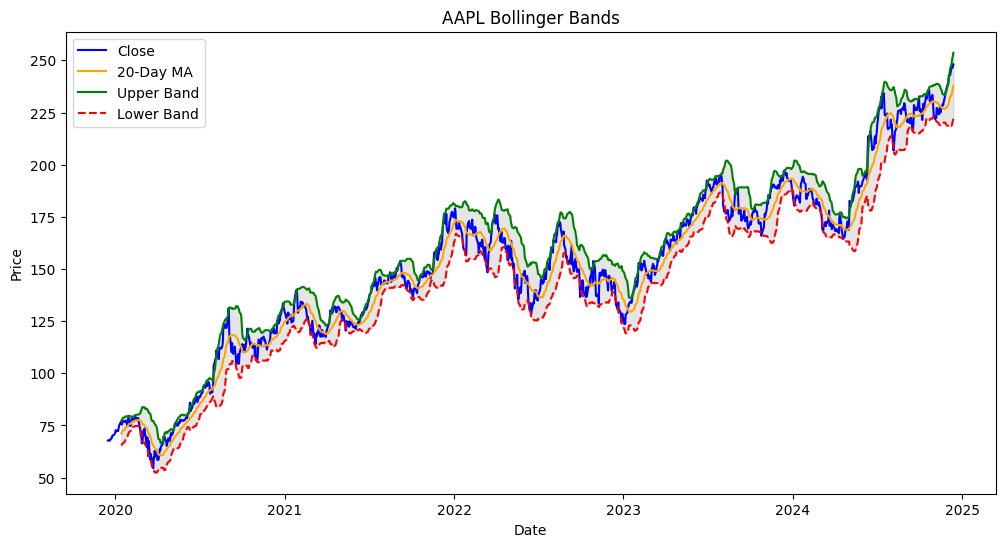

In [16]:
data['20D MA'] = data['Close'].rolling(window=20).mean()
data['Upper Band'] = data['20D MA'] + 2 * data['Close'].rolling(window=20).std()
data['Lower Band'] = data['20D MA'] - 2 * data['Close'].rolling(window=20).std()


plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close', color='blue')
plt.plot(data['20D MA'], label='20-Day MA', color='orange')
plt.plot(data['Upper Band'], label='Upper Band', color ='green')
plt.plot(data['Lower Band'], label='Lower Band', color='red', linestyle='--')
plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.2)
plt.title(f"{ticker} Bollinger Bands")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

AAPL Daily Volatility:  1.99%


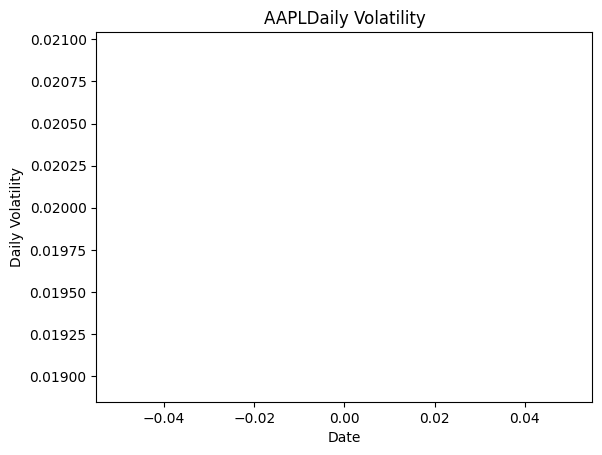

In [17]:
volatility = data['Daily Return'].std()
print(f"{ticker} Daily Volatility: {volatility: .2%}")

plt.plot(data['Daily Return'].std(),color='green')
plt.title(f"{ticker}Daily Volatility")
plt.xlabel('Date')
plt.ylabel('Daily Volatility')
plt.show()

AAPL Daily Volatility:  1.99%


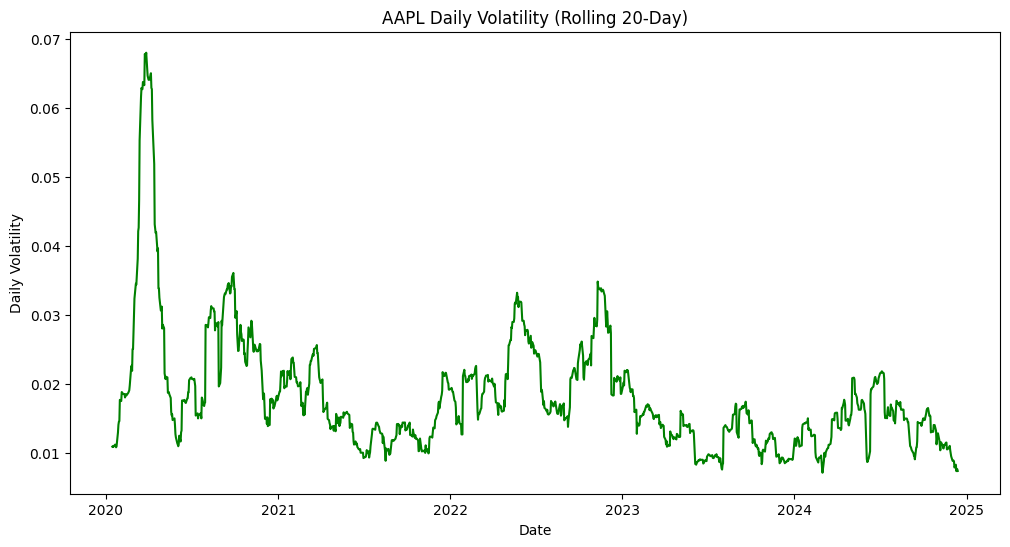

In [18]:
volatility = data['Daily Return'].std()
print(f"{ticker} Daily Volatility: {volatility: .2%}")

# Instead of plotting just the standard deviation, which is a single number,
# we'll plot a rolling standard deviation to visualize how it changes over time.
data['Rolling Volatility'] = data['Daily Return'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Rolling Volatility'], color='green')
plt.title(f"{ticker} Daily Volatility (Rolling 20-Day)")
plt.xlabel('Date')
plt.ylabel('Daily Volatility')
plt.show()

In [19]:
risk_free_rate = 0.01
sharp_ratio = (data['Daily Return'].mean() - risk_free_rate) / data['Daily Return'].std()
print(f"{ticker} Sharp Ratio: {sharp_ratio: .2f}")


AAPL Sharp Ratio: -0.44


In [22]:
import numpy as np

# Access the 'Daily Return' column from the 'data' DataFrame
daily_returns = data['Daily Return']

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

# Create a DataFrame with an index
stock_stats = pd.DataFrame({
    'Expected Return': [expected_returns],  # Put the scalar value in a list
    'Volatility': [volatility]  # Put the scalar value in a list
}, index=['AAPL'])  # Specify an index, for example, the stock ticker

stock_stats

,Expected Return,Volatility
AAPL,0.310178,0.316625


[*********************100%***********************]  3 of 3 completed


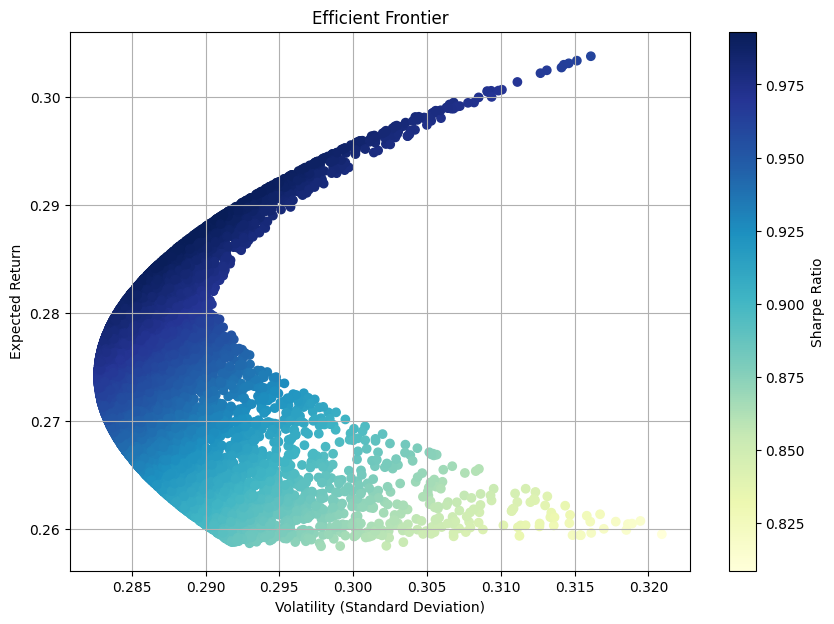

In [26]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# Get closing prices for multiple assets (replace with your desired assets)
tickers = ['AAPL', 'MSFT', 'GOOG']
data = yf.download(tickers, period="5y")['Close']

# Calculate daily returns for each asset
daily_returns = data.pct_change()

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

# Calculate expected returns for the portfolio assets (annualized)
expected_returns = daily_returns.mean() * 252  # Use daily_returns here, not the previous expected_returns

np.random.seed(42)

# Accessing unique tickers from the DataFrame columns
unique_tickers = data.columns

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return  # Now, portfolio_return is a scalar
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [27]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.2874722413203199, 0.28948752231437447, 0.9930384529946474)

In [28]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,AAPL,0.362673
1,GOOG,0.343014
2,MSFT,0.294312
